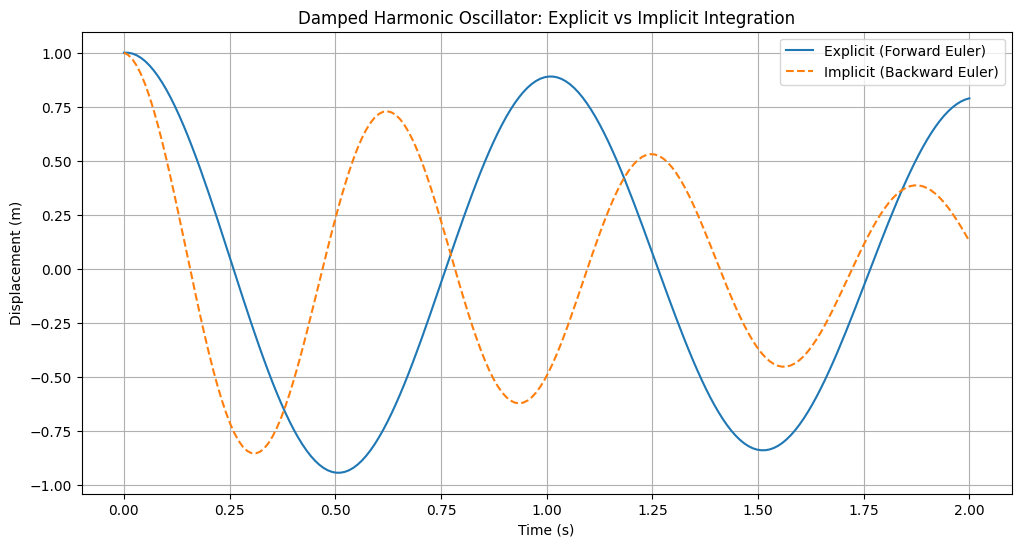

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega_0 = 2 * np.pi  # Natural frequency (rad/s)
zeta = 0.05  # Damping ratio
dt = 0.01  # Time step
t_max = 2  # Maximum time
num_steps = int(t_max / dt)  # Number of time steps

# Time array
t = np.linspace(0, t_max, num_steps)

# Initial conditions
x0 = 1.0
v0 = 0.0

# Explicit (Forward Euler) method
x_explicit = np.zeros(num_steps)
v_explicit = np.zeros(num_steps)
x_explicit[0] = x0
v_explicit[0] = v0

for i in range(1, num_steps):
    v_explicit[i] = v_explicit[i - 1] - dt * (2 * zeta * omega_0 * v_explicit[i - 1] + omega_0**2 * x_explicit[i - 1])
    x_explicit[i] = x_explicit[i - 1] + dt * v_explicit[i - 1]

# Implicit (Backward Euler) method
x_implicit = np.zeros(num_steps)
v_implicit = np.zeros(num_steps)
x_implicit[0] = x0
v_implicit[0] = v0

for i in range(1, num_steps):
    A = 1 + dt * 2 * zeta * omega_0 + (dt * omega_0)**2
    B = x_implicit[i - 1] + dt * v_implicit[i - 1]
    x_implicit[i] = B / A
    v_implicit[i] = (x_implicit[i] - x_implicit[i - 1]) / dt

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(t, x_explicit, label='Explicit (Forward Euler)')
plt.plot(t, x_implicit, label='Implicit (Backward Euler)', linestyle='dashed')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Damped Harmonic Oscillator: Explicit vs Implicit Integration')
plt.legend()
plt.grid(True)
plt.show()
